In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
sns.set(style='darkgrid')

In [4]:
raw_data = pd.read_csv('fake_job_postings.csv')

In [5]:
raw_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
raw_data.shape

(17880, 18)

In [7]:
stop_words = nlp.Defaults.stop_words

In [8]:
raw_data.title.value_counts()

English Teacher Abroad                                             311
Customer Service Associate                                         146
Graduates: English Teacher Abroad (Conversational)                 144
English Teacher Abroad                                              95
Software Engineer                                                   86
English Teacher Abroad (Conversational)                             83
Customer Service Associate - Part Time                              76
Account Manager                                                     75
Web Developer                                                       66
Project Manager                                                     62
Beauty & Fragrance consultants needed                               60
Graduates: English Teacher Abroad                                   57
Customer Service Representative                                     51
Administrative Assistant                                            48
Produc

In [9]:
raw_data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

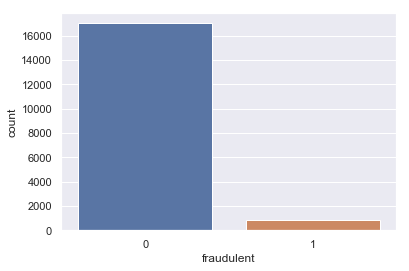

In [10]:
sns.countplot(raw_data.fraudulent)

In [11]:
raw_data.groupby('fraudulent').count()['title'].reset_index().sort_values('title',ascending=False)

,fraudulent,title
0,0,17014
1,1,866


In [12]:
#Imbalanced Dataset

In [13]:
df = raw_data.copy()

In [14]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [15]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [16]:
df.employment_type.value_counts()

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [17]:
df = df.drop(columns=['job_id','telecommuting','has_company_logo','has_questions','employment_type','salary_range'], axis=1)

In [18]:
df.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent'],
      dtype='object')

In [19]:
df.isnull().sum()

title                      0
location                 346
department             11547
company_profile         3308
description                1
requirements            2695
benefits                7210
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [20]:
df.location.head()

0      US, NY, New York
1        NZ, , Auckland
2         US, IA, Wever
3    US, DC, Washington
4    US, FL, Fort Worth
Name: location, dtype: object

In [21]:
df.location.iloc[156].split(',')[0]

'US'

In [22]:
df.dtypes

title                  object
location               object
department             object
company_profile        object
description            object
requirements           object
benefits               object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [23]:
df['country'] = df.location.apply(lambda x: str(x).split(',')[0])

In [24]:
country = dict(df.country.value_counts()[:10])

In [25]:
country

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'nan': 346,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132}

<BarContainer object of 10 artists>

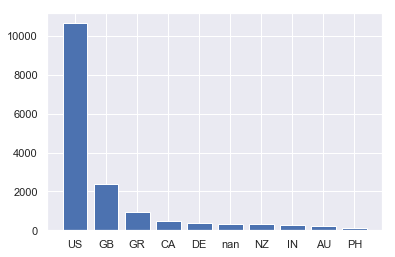

In [26]:
plt.bar(x=country.keys(),height=country.values(),)

In [27]:
#Clearly most jobs openings are in US

In [28]:
df.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent', 'country'],
      dtype='object')

In [29]:
#Exploring the experience required

In [30]:
df.required_experience.value_counts()

Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

In [31]:
df.required_experience.isnull().sum()

7050

In [32]:
df.department.value_counts()[:10]

Sales                     551
Engineering               487
Marketing                 401
Operations                270
IT                        225
Development               146
Product                   112
Information Technology     86
Design                     76
Technology                 76
Name: department, dtype: int64

In [33]:
df.title.value_counts()[:10]

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64

In [34]:
df.isnull().sum()

title                      0
location                 346
department             11547
company_profile         3308
description                1
requirements            2695
benefits                7210
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
country                    0
dtype: int64

In [35]:
df['text']=df['title']+' '+df['country']+' '+df['company_profile'].fillna(' ')+' '+df['description'].fillna(' ')+' '+df['requirements'].fillna(' ')+' '+df['benefits'].fillna(' ')

In [36]:
df.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent', 'country', 'text'],
      dtype='object')

In [37]:
#df = df.drop('text',axis=1)
#df.text
df = df.drop(columns=['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'required_experience', 'required_education',
       'industry', 'function','country'],axis=1)

In [38]:
df.head()

,fraudulent,text
0,0,"Marketing Intern US We're Food52, and we've cr..."
1,0,Customer Service - Cloud Video Production NZ 9...
2,0,Commissioning Machinery Assistant (CMA) US Val...
3,0,Account Executive - Washington DC US Our passi...
4,0,Bill Review Manager US SpotSource Solutions LL...


In [39]:
fraud_jobs = df[df['fraudulent']==1].text
real_jobs = df[df['fraudulent']==0].text

In [40]:
len(fraud_jobs)

866

In [41]:
from wordcloud import WordCloud

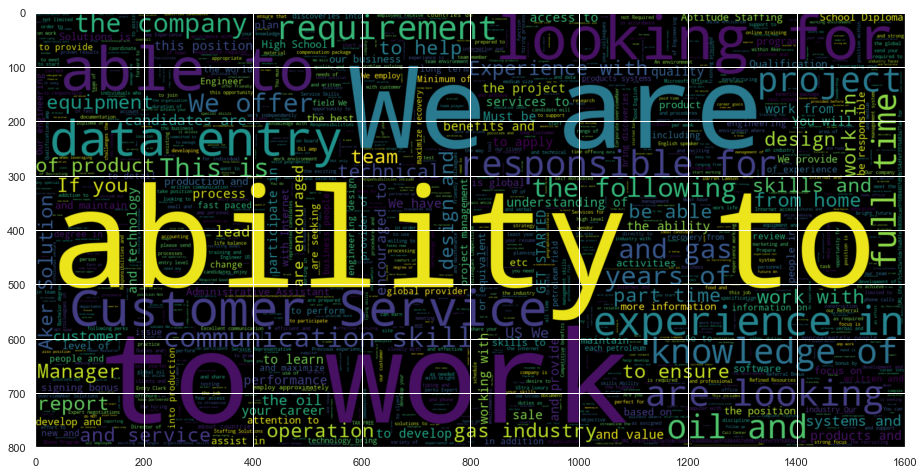

In [42]:
plt.figure(figsize=(16,8))
wc = WordCloud(width=1600,height=800,
         stopwords=stop_words,
         min_font_size=3,
         max_words=3000).generate(str(" ".join(fraud_jobs)))
plt.imshow(wc,interpolation='bilinear')

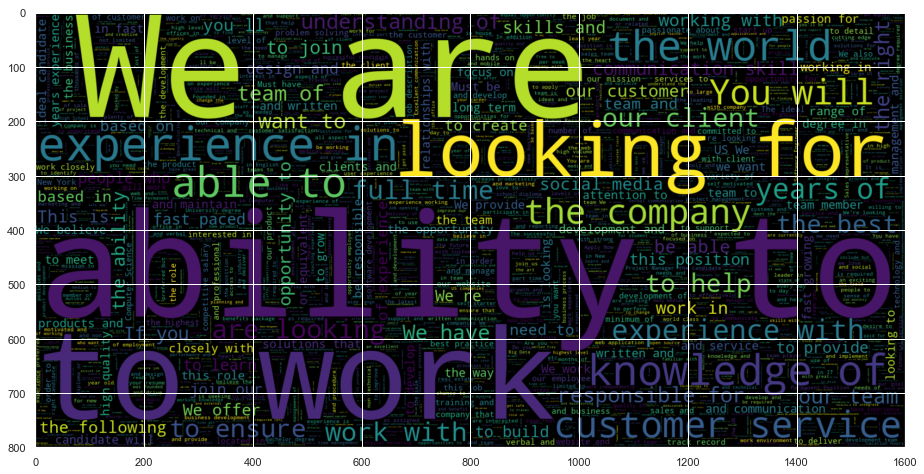

In [43]:
plt.figure(figsize=(16,8))
wc = WordCloud(height=800,width=1600,
         stopwords=stop_words,
         min_font_size=3,
         max_words=3000).generate(str(" ".join(real_jobs)))
plt.imshow(wc,interpolation='bilinear')

In [44]:
from bs4 import BeautifulSoup

In [45]:
import string

In [46]:
import re

In [47]:
from nltk.stem import SnowballStemmer

In [48]:
stemmer = SnowballStemmer('english')

In [49]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub("\[[^]]*\]","",text)

def remove_between_square_brackets(text):
    return re.sub(r"http\S+", "",text)

def remove_punctuations(text):
    return re.sub('['+string.punctuation+']','',text)

def remove_stopwords(text,stem=False):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop_words:
            if stem:
                final_text.append(stemmer.stem(i.strip()))
            else:
                final_text.append(i.strip())
    return " ".join(final_text)

def denoise_data(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_punctuations(text)
    text = remove_stopwords(text)
    return text

In [50]:
df.text = df.text.apply(denoise_data)

In [51]:
def get_corpus(text):
    words = []
    for word in text.split():
        words.append(word.strip().lower())
    return words

In [52]:
corpus = []

In [53]:
corpus.extend(df.text.iloc[0].split())

In [54]:
df.text.apply(lambda x: corpus.extend(x.split()))

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
17850    None
17851    None
17852    None
17853    None
17854    None
17855    None
17856    None
17857    None
17858    None
17859    None
17860    None
17861    None
17862    None
17863    None
17864    None
17865    None
17866    None
17867    None
17868    None
17869    None
17870    None
17871    None
17872    None
17873    None
17874    None
17875    None
17876    None
17877    None
17878    None
17879    None
Name: text, Length: 17880, dtype: object

In [55]:
len(corpus)

4083848

In [56]:
from collections import Counter

In [57]:
counter = Counter(corpus)

In [58]:
most_common = counter.most_common(10)

In [59]:
most_common

[('work', 32833),
 ('team', 29678),
 ('experience', 29194),
 ('business', 17389),
 ('company', 17108),
 ('new', 14949),
 ('skills', 14647),
 ('working', 13881),
 ('customer', 13706),
 ('development', 12852)]

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
def get_top_text_ngrams(corpus,n,g):
    vec = CountVectorizer(ngram_range=(g,g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_of_words = bag_of_words.sum(axis=0)
    word_freq = [(word,sum_of_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq,key=lambda x: x[1], reverse=True)
    
    return word_freq[:n]

In [62]:
#Unigram analysis
most_common_uni = get_top_text_ngrams(corpus,10,1)

In [63]:
most_common_uni = dict(most_common_uni)

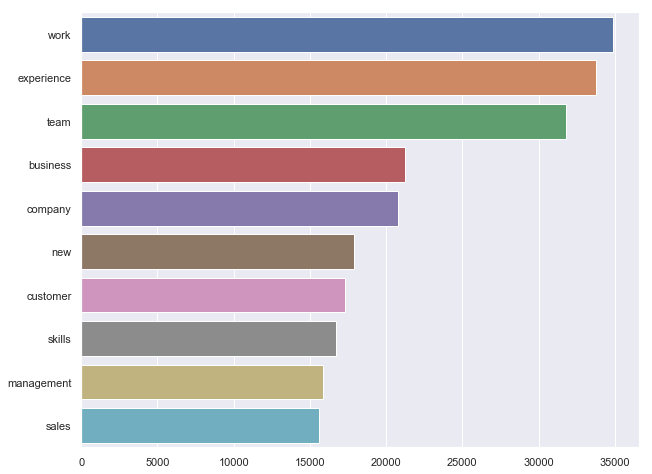

In [64]:
plt.figure(figsize=(10,8))
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

In [65]:
#bigram analysis
most_common_bi = get_top_text_ngrams(corpus,10,2)
most_common_bi = dict(most_common_bi)

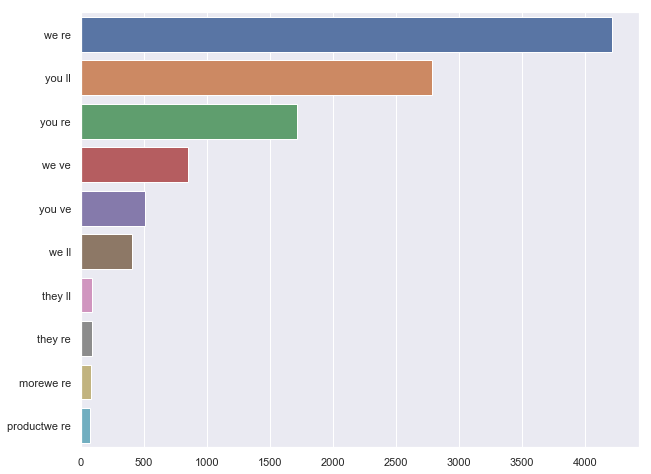

In [66]:
plt.figure(figsize=(10,8))
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

In [67]:
#trigram analysis
most_common_tri = get_top_text_ngrams(corpus,10,3)
most_common_tri = dict(most_common_tri)

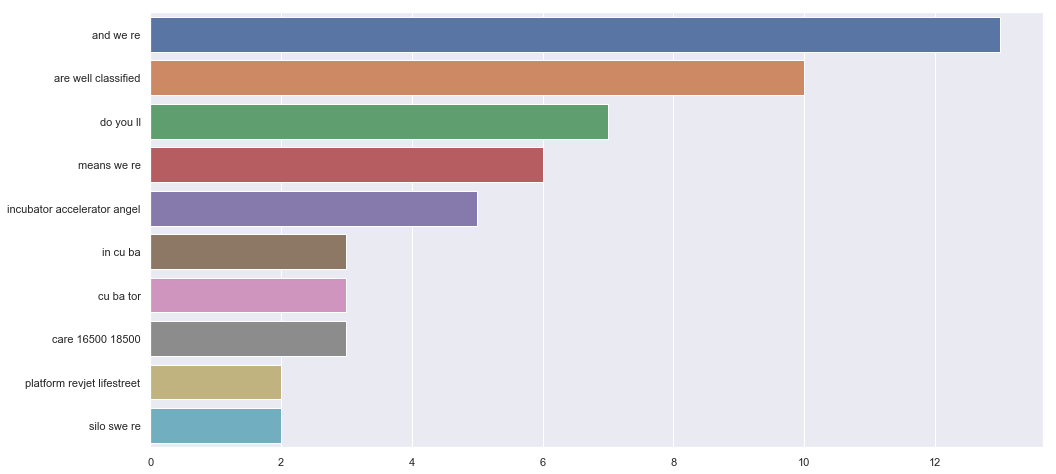

In [68]:
plt.figure(figsize=(16,8))
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df.text,df.fraudulent, test_size = 0.2, random_state=0)

In [71]:
X_test.shape

(3576,)

In [72]:
vec = CountVectorizer()

In [73]:
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

In [74]:
#Logistic Regression Model

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
logit = LogisticRegression(C=0.1, solver='lbfgs', max_iter=1000, verbose=0, n_jobs=-1)

In [77]:
logit.fit(X_train_vec,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=-1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
pred = logit.predict(X_test_vec)

In [79]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [80]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred,target_names=['Fraud Jobs','Real Jobs']))

0.9860178970917226
[[3414    9]
 [  41  112]]
              precision    recall  f1-score   support

  Fraud Jobs       0.99      1.00      0.99      3423
   Real Jobs       0.93      0.73      0.82       153

   micro avg       0.99      0.99      0.99      3576
   macro avg       0.96      0.86      0.91      3576
weighted avg       0.99      0.99      0.99      3576



In [81]:
#Glove Model

In [82]:
max_features = 10000
maxlen = 300

In [83]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [84]:
tokenizer = Tokenizer(num_words=max_features)

In [85]:
tokenizer.fit_on_texts(X_train)

In [86]:
tokenized_train = tokenizer.texts_to_sequences(X_train)

In [87]:
tokenized_test = tokenizer.texts_to_sequences(X_test)

In [88]:
from keras.preprocessing import sequence

In [89]:
X_train_token = sequence.pad_sequences(tokenized_train,maxlen=maxlen)
X_test_token = sequence.pad_sequences(tokenized_test,maxlen=maxlen)

In [90]:
embedding_file = 'glove.6B.200d.txt'

In [91]:
embedding_dict = {}

with open(embedding_file,encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:],dtype='float64')
        embedding_dict[word] = coefs

In [92]:
vocab_size = len(tokenizer.word_index)+1

In [93]:
all_embs = np.stack(embedding_dict.values())

In [94]:
all_embs.shape

(400000, 200)

In [95]:
embs_mean, embs_std = all_embs.mean(), all_embs.std()

In [96]:
embs_mean,embs_std

(-0.008671859820026773, 0.3818620572721229)

In [97]:
embs_size = all_embs.shape[1]

In [98]:
word_index = tokenizer.word_index

In [99]:
nb_words = min(max_features,len(word_index))

In [100]:
nb_words,embs_size

(10000, 200)

In [101]:
embedding_matrix = embedding_matrix = np.random.normal(embs_mean,embs_std,(nb_words,embs_size))

In [102]:
for word,index in word_index.items():
    if index >= max_features:
        continue
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [103]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Dense,BatchNormalization,Dropout,Embedding,LSTM
from tensorflow.keras.optimizers import Adam

In [104]:
X_train_token.shape

(14304, 300)

In [105]:
model = Sequential()
'''model.add(Embedding(max_features,embs_size,weights=[embedding_matrix],input_length=maxlen,trainable=False))

model.add(Dense(200,input_dim=200,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(1,activation='sigmoid'))'''
model.add(Embedding(max_features,output_dim=embs_size,weights=[embedding_matrix], input_length = maxlen,trainable=False))
#LSTM layer
model.add(LSTM(units=128,return_sequences=True,recurrent_dropout=0.25,dropout=0.25))
model.add(LSTM(units=64,recurrent_dropout=0.1,dropout=0.1))

model.add(Dense(units=32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [106]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [107]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 200)          2000000   
_________________________________________________________________
lstm (LSTM)                  (None, 300, 128)          168448    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 2,219,969
Trainable params: 219,969
Non-trainable params: 2,000,000
_________________________________________________________________


In [109]:
r= model.fit(X_train_token,y_train,validation_data=(X_test_token,y_test),epochs=3,verbose=1,batch_size=500)

Train on 14304 samples, validate on 3576 samples
Epoch 1/3
14304/14304 [==============================] - ETA: 32:14 - loss: 0.1929 - acc: 0.95 - ETA: 18:17 - loss: 0.1767 - acc: 0.95 - ETA: 13:22 - loss: 0.1841 - acc: 0.95 - ETA: 10:30 - loss: 0.1875 - acc: 0.95 - ETA: 8:28 - loss: 0.1932 - acc: 0.9468 - ETA: 7:11 - loss: 0.1924 - acc: 0.947 - ETA: 6:09 - loss: 0.1890 - acc: 0.948 - ETA: 5:21 - loss: 0.1879 - acc: 0.949 - ETA: 4:42 - loss: 0.1857 - acc: 0.949 - ETA: 4:10 - loss: 0.1823 - acc: 0.950 - ETA: 3:42 - loss: 0.1843 - acc: 0.950 - ETA: 3:19 - loss: 0.1856 - acc: 0.949 - ETA: 2:59 - loss: 0.1820 - acc: 0.950 - ETA: 2:40 - loss: 0.1816 - acc: 0.950 - ETA: 2:23 - loss: 0.1812 - acc: 0.950 - ETA: 2:08 - loss: 0.1806 - acc: 0.950 - ETA: 1:55 - loss: 0.1793 - acc: 0.950 - ETA: 1:42 - loss: 0.1799 - acc: 0.950 - ETA: 1:30 - loss: 0.1811 - acc: 0.949 - ETA: 1:18 - loss: 0.1803 - acc: 0.949 - ETA: 1:08 - loss: 0.1797 - acc: 0.949 - ETA: 57s - loss: 0.1790 - acc: 0.950 - ETA: 48s - los